# matplotlib exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])#距离太阳距离

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [5]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])#轨道周期

Finally, the names of the planets corresponding to these are:

In [7]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

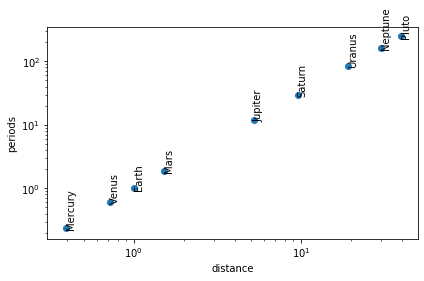

In [27]:
fig, ax = plt.subplots()
ax.scatter(a,P)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('distance')
ax.set_ylabel('periods')

for i in range(9):
    ax.text(a[i],P[i],names[i],rotation=90,size=10)
plt.tight_layout()

## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

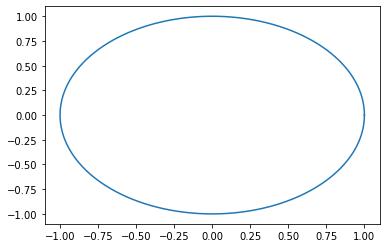

In [41]:
theta=np.linspace(0,2*np.pi,100000)
R=1
x=[R*np.cos(i) for i in theta]
y=[R*np.sin(i) for i in theta]
plt.axis(aspect='equal')
plt.plot(x,y)

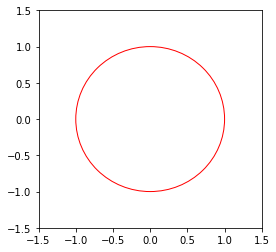

In [57]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 1, color='red',fill=False)
fig, ax = plt.subplots(1,1,figsize=(4,4)) 
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))
ax.add_artist(circle1)


## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

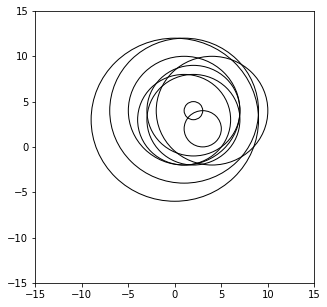

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(5,5)) 
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))
color=['red','green','blue','black','blue','orange','purple','yellow','dark blue']
def draw_circle():
    R=np.random.randint(1,10,1)
    x0=np.random.randint(0,5,1)
    y0=np.random.randint(0,5,1)
    circle1 = plt.Circle((x0, y0), R,fill=False)
    ax.add_artist(circle1)

for i in range(9):
    draw_circle()
    
    

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

In [61]:
data=np.loadtxt('https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt',skiprows=4)

In [72]:
import pandas as pd
import datetime 
data=pd.DataFrame(data,columns=['year','tem_change','smooth_repre'])
data.year=pd.to_datetime(data.year,format="%Y")
data.year=data['year'].dt.year
data.head()

,year,tem_change,smooth_repre
0,1880,-0.20,-0.12
1,1881,-0.11,-0.15
2,1882,-0.09,-0.18
3,1883,-0.19,-0.20
4,1884,-0.27,-0.23


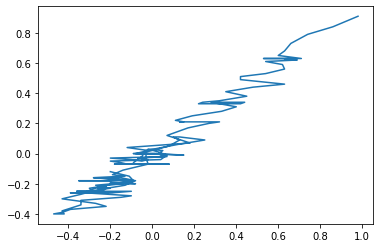

In [73]:
fit=plt.figure()
plt.subplot(111)
plt.plot(data.tem_change,data.smooth_repre)
plt.xlim=(np.max(data.tem_change),np.min(data.tem_change))

In [74]:
data['iszero']=np.where(data.tem_change>=0,1,0)

In [81]:
data.year.max()-data.year.min()

136

([<matplotlib.axis.XTick at 0x235322db688>,
 <a list of 7 Text xticklabel objects>)

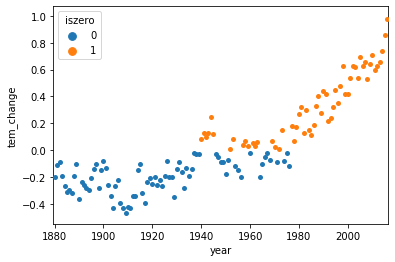

In [83]:
data.set_index(data.year,drop=True)
import seaborn as sns
sns.stripplot(y = "tem_change", x = "year", hue = "iszero", data = data, jitter = True)#hue制定分组变量
plt.xticks([0,20,40,60,80,100,120],['1880','1900','1920','1940','1960','1980','2000'])

## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

### 6.1 Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [100]:
f = open("shore_leave.txt", "r").read()

In [87]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

In [104]:
wordsL = []#use this list to save the words
for line in f:
    line=line.replace('.',' ').replace(',',' ').split() #去掉标点,并分裂\n",
    line=line.strip()#删除首位空白
    line=line.split(' ')
    wordsL=wordsL+line

AttributeError: 'list' object has no attribute 'strip'

In [106]:
a='i,am.'
a.replace('.',' ').replace(',',' ').split()

['i', 'am']

### 2. Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

In [1]:
# your code here